In [1]:
import pandas as pd

In [2]:
# read data
price_df = pd.read_csv("./data/forecasting.csv")
price_df.columns = price_df.columns.str.lower()
price_df["date"] = pd.to_datetime(price_df["date"])
len(price_df)

43544

In [29]:
# reformat categories from categories
price_df["is_apartment"] = (
    price_df["categories"].map(lambda x: "APARTMENT" in x).map(int)
)

price_df["categories"] = price_df["categories"].str.replace("DUPLEX, ", "")

price_df["is_duplex"] = price_df["categories"].map(lambda x: "DUPLEX" in x).map(int)

price_df["categories"] = price_df["categories"].str.replace("APARTMENT, ", "")

# categorize with ChatGPT
personal = [
    "DUPLEX",
    "FURNISHED_FLAT",
    "APARTMENT",
    "FLAT",
    "ROOF_FLAT",
    "ATTIC_FLAT",
    "LOFT",
    "SINGLE_ROOM",
    "STUDIO",
    "HOUSE",
    "ROW_HOUSE",
    "DUPLEX, MAISONETTE",
    "HOUSE, SINGLE_HOUSE",
    "ROW_HOUSE",
    "ATTIC",
    "BIFAMILIAR_HOUSE",
    "HOUSE, BIFAMILIAR_HOUSE",
    "TERRACE_FLAT",
    "BACHELOR_FLAT",
    "HOUSE, VILLA",
    "HOUSE, MULTIPLE_DWELLING",
    "VILLA",
]

commercial = [
    "OFFICE",
    "COMMERCIAL",
    "RETAIL, PRACTICE",
    "SHOP, ATELIER",
    "RETAIL, COMMERCIAL",
    "RESTAURANT",
    "WORKSHOP",
    "RETAIL, SHOP",
    "SHOP",
    "RESIDENTIAL_COMMERCIAL_BUILDING",
    "HOBBY_ROOM",
    "INDUSTRIAL_OBJECT",
    "STORAGE_ROOM",
    "ATELIER",
    "CAFE_BAR, RESTAURANT",
    "RETAIL, HAIRDRESSER",
    "RETAIL_SPACE, ATELIER",
    "ADVERTISING_AREA",
    "FACTORY",
    "RETAIL, STORAGE_ROOM",
    "UNDERGROUND_SLOT",
    "CAFE_BAR, BAR",
    "PRACTICE",
    "COFFEEHOUSE",
]

price_df["is_personal"] = price_df["categories"].isin(personal).map(int).fillna(0)
price_df["is_commercial"] = price_df["categories"].isin(commercial).map(int).fillna(0)

is_commercial
0    30463
1      374
Name: count, dtype: int64

In [23]:
# remove NAs
print(price_df.price.isna().value_counts())
print(price_df.space.isna().value_counts())
price_df = price_df.dropna(subset=["price", "space"])
len(price_df)

price
False    30837
Name: count, dtype: int64
space
False    30837
Name: count, dtype: int64


30837

In [35]:
price_df.drop(columns=["date", "categories"]).corr().style.background_gradient(
    cmap="coolwarm"
)

,price,space,is_apartment,is_personal,is_commercial,is_duplex
price,1.000000,0.159076,-0.032181,-0.038613,0.024521,0.030468
space,0.159076,1.000000,-0.070387,-0.238919,0.154457,0.233478
is_apartment,-0.032181,-0.070387,1.000000,0.118886,-0.088594,-0.152909
is_personal,-0.038613,-0.238919,0.118886,1.000000,-0.745202,0.028435
is_commercial,0.024521,0.154457,-0.088594,-0.745202,1.000000,-0.021190
is_duplex,0.030468,0.233478,-0.152909,0.028435,-0.021190,1.000000


In [40]:
price_df.join(pd.get_dummies(price_df["categories"]).applymap(int)).drop(
    columns=["date", "categories"]
).corr().style.background_gradient(cmap="coolwarm")

,price,space,is_apartment,is_personal,is_commercial,is_duplex,ADVERTISING_AREA,APARTMENT,ATELIER,ATTIC,ATTIC_FLAT,BACHELOR_FLAT,BIFAMILIAR_HOUSE,"CAFE_BAR, BAR","CAFE_BAR, RESTAURANT",COFFEEHOUSE,COMMERCIAL,DUPLEX,FACTORY,FLAT,FURNISHED_FLAT,HOBBY_ROOM,"HOUSE, BIFAMILIAR_HOUSE","HOUSE, MULTIPLE_DWELLING","HOUSE, ROW_HOUSE","HOUSE, SINGLE_HOUSE","HOUSE, VILLA",INDUSTRIAL_OBJECT,LOFT,MAISONETTE,OFFICE,PRACTICE,RESIDENTIAL_COMMERCIAL_BUILDING,RESTAURANT,"RETAIL, COMMERCIAL","RETAIL, HAIRDRESSER","RETAIL, PRACTICE","RETAIL, SHOP","RETAIL, STORAGE_ROOM","RETAIL_SPACE, ATELIER",ROOF_FLAT,ROW_HOUSE,SHOP,"SHOP, ATELIER",SINGLE_HOUSE,SINGLE_ROOM,STORAGE_ROOM,STUDIO,TERRACE_FLAT,UNDERGROUND_SLOT,VILLA,WORKSHOP
price,1.000000,0.159076,-0.032181,-0.038613,0.024521,0.030468,-0.001924,-0.032181,-0.000166,-0.012230,0.015580,-0.000318,0.014829,0.000893,0.000668,0.005063,0.003133,0.030468,-0.000065,-0.023234,0.050051,-0.007018,0.009266,-0.000210,0.018344,0.029603,0.007957,0.026434,0.004581,0.010853,0.017612,-0.001008,-0.000265,0.013507,0.005902,0.000893,-0.000578,0.016376,-0.001586,-0.000311,0.004843,0.018516,0.003829,0.000774,0.023966,-0.025083,-0.001287,-0.013471,0.001731,-0.001766,0.014552,-0.000812
space,0.159076,1.000000,-0.070387,-0.238919,0.154457,0.233478,-0.008116,-0.070387,0.003379,-0.068623,0.060133,-0.004045,0.098405,-0.003023,0.001265,0.007697,0.015719,0.233478,0.011985,-0.090276,-0.004270,-0.033352,0.047682,0.000700,0.096025,0.164223,0.033221,0.025380,0.038048,0.078618,0.127922,-0.000164,0.013002,0.124553,0.055092,-0.008025,-0.008741,0.066367,-0.006739,0.006730,0.058160,0.084052,0.033303,-0.002417,0.146402,-0.193071,0.014928,-0.110947,0.009397,-0.001451,0.071029,0.008468
is_apartment,-0.032181,-0.070387,1.000000,0.118886,-0.088594,-0.152909,-0.006439,1.000000,-0.018779,-0.038138,-0.090845,-0.009107,-0.027713,-0.004553,-0.004553,-0.004553,-0.012048,-0.152909,-0.004553,-0.619818,-0.246677,-0.019853,-0.017639,-0.012048,-0.041286,-0.044915,-0.006439,-0.007887,-0.057925,-0.049344,-0.056830,-0.004553,-0.007887,-0.017040,-0.017040,-0.004553,-0.010182,-0.040004,-0.004553,-0.007887,-0.152690,-0.043738,-0.018779,-0.021364,-0.044213,-0.105532,-0.006439,-0.075846,-0.023227,-0.004553,-0.013662,-0.011154
is_personal,-0.038613,-0.238919,0.118886,1.000000,-0.745202,0.028435,-0.054165,0.118886,-0.157955,0.007092,0.016894,0.001694,0.005153,-0.038300,-0.038300,-0.038300,-0.101341,0.028435,-0.038300,0.115262,0.045872,-0.166993,0.003280,0.002240,-0.347275,0.008352,0.001197,-0.066339,0.010772,-0.415056,-0.478023,-0.038300,-0.066339,-0.143335,-0.143335,-0.038300,-0.085646,-0.336494,-0.038300,-0.066339,0.028394,0.008134,-0.157955,-0.179703,-0.371891,0.019625,-0.054165,0.014104,0.004319,-0.038300,0.002541,-0.093822
is_commercial,0.024521,0.154457,-0.088594,-0.745202,1.000000,-0.021190,0.072685,-0.088594,0.211962,-0.005285,-0.012589,-0.001262,-0.003840,0.051395,0.051395,0.051395,0.135992,-0.021190,0.051395,-0.085893,-0.034184,0.224091,-0.002444,-0.001670,-0.005721,-0.006224,-0.000892,0.089022,-0.008027,-0.006838,0.641467,0.051395,0.089022,0.192343,0.192343,0.051395,0.114930,0.451547,0.051395,0.089022,-0.021160,-0.006061,0.211962,0.241146,-0.006127,-0.014624,0.072685,-0.010511,-0.003219,0.051395,-0.001893,0.125902
is_duplex,0.030468,0.233478,-0.152909,0.028435,-0.021190,1.000000,-0.001540,-0.152909,-0.004491,-0.009122,-0.021728,-0.002178,-0.006628,-0.001089,-0.001089,-0.001089,-0.002882,1.000000,-0.001089,-0.148248,-0.059000,-0.004748,-0.004219,-0.002882,-0.009875,-0.010743,-0.001540,-0.001886,-0.013855,-0.011802,-0.013593,-0.001089,-0.001886,-0.004076,-0.004076,-0.001089,-0.002435,-0.009568,-0.001089,-0.001886,-0.036520,-0.010461,-0.004491,-0.005110,-0.010575,-0.025241,-0.001540,-0.018141,-0.005555,-0.001089,-0.003268,-0.002668
ADVERTISING_AREA,-0.001924,-0.008116,-0.006439,-0.054165,0.072685,-0.001540,1.000000,-0.006439,-0.000189,-0.000384,-0.000915,-0.000092,-0.000279,-0.000046,-0.000046,-0.000046,-0.000121,-0.001540,-0.000046,-0.006243,-0.002485,-0.000

In [53]:
from pycaret.regression import RegressionExperiment

s = RegressionExperiment()
s.setup(price_df, target="price", session_id=123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(30837, 8)"
4,Transformed data shape,"(30837, 10)"
5,Transformed train set shape,"(21585, 10)"
6,Transformed test set shape,"(9252, 10)"
7,Numeric features,5
8,Date features,1
9,Categorical features,1


In [54]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,382.9702,35397960.4498,2441.1222,0.5717,0.3376,0.2404,0.0280
lasso,Lasso Regression,381.3763,35398532.9300,2441.1743,0.5717,0.3315,0.2391,0.0140
ridge,Ridge Regression,382.9186,35397954.2655,2441.1120,0.5717,0.3375,0.2404,0.0150
lar,Least Angle Regression,382.9702,35397960.4498,2441.1222,0.5717,0.3376,0.2404,0.0150
llar,Lasso Least Angle Regression,381.3764,35398532.8477,2441.1743,0.5717,0.3315,0.2391,0.0170
br,Bayesian Ridge,383.8867,35408747.9669,2449.6942,0.5631,0.3336,0.2435,0.0140
en,Elastic Net,386.4244,35414238.0621,2449.8558,0.5627,0.3351,0.2437,0.0180
huber,Huber Regressor,360.1026,35426166.3255,2455.9729,0.5572,0.3011,0.2098,0.0490
ada,AdaBoost Regressor,416.8328,35620883.1075,2581.5908,0.4176,0.3182,0.2976,0.0900
dt,Decision Tree Regressor,388.3516,35640761.1055,2571.3520,0.4142,0.3132,0.2532,0.0240


In [55]:
print(best)

LinearRegression(n_jobs=-1)


In [56]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

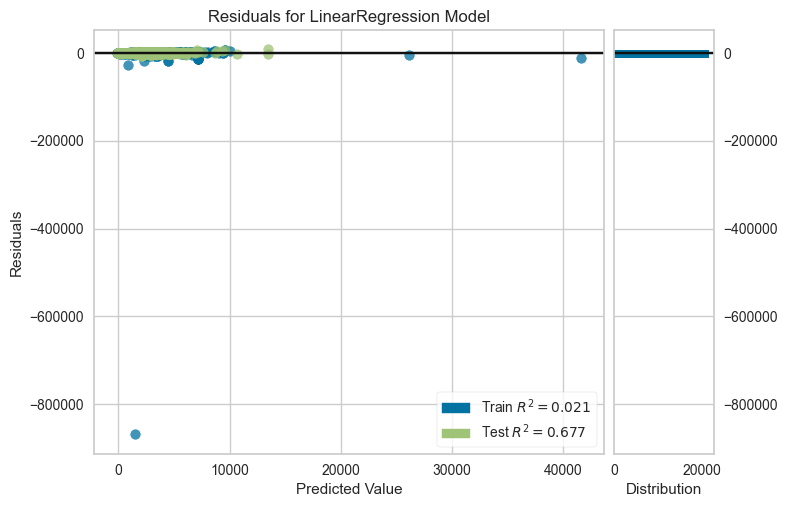

In [57]:
s.plot_model(best, plot="residuals")

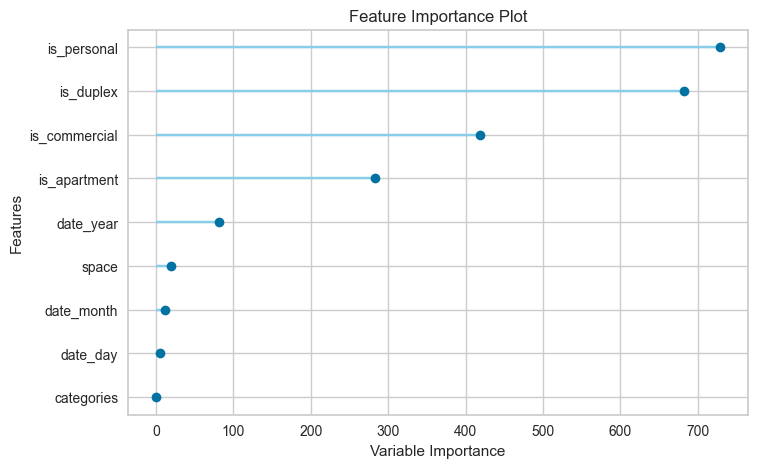

In [58]:
s.plot_model(best, plot="feature")

In [59]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,331.0961,274170.0352,523.6125,0.6765,0.3189,0.2206


,date,space,categories,is_apartment,is_personal,is_commercial,is_duplex,price,prediction_label
38091,2018-12-11,53.0,APARTMENT,1,1,0,0,1010.0,1242.190342
16222,2018-03-15,160.0,DUPLEX,0,1,0,1,2600.0,3237.618780
12194,2020-08-05,135.0,MAISONETTE,0,0,0,0,4650.0,2645.541562
39964,2018-08-03,62.0,APARTMENT,1,1,0,0,1150.0,1406.409825
7512,2021-09-09,104.0,FLAT,0,1,0,0,2770.0,2287.186394
...,...,...,...,...,...,...,...,...,...
36984,2020-05-26,159.0,FLAT,0,1,0,0,2300.0,3314.817441
32987,2019-01-10,63.0,APARTMENT,1,1,0,0,1170.0,1228.919209
37407,2020-11-18,63.0,FLAT,0,1,0,0,1500.0,1552.278557
21092,2020-07-21,65.0,FLAT,0,1,0,0,1545.0,1529.763268
